You need to submit 3 bar charts, 3 stacked bar charts, 3 pie charts, and 3 donut charts using Tableau or PowerBI, Python and R using the data from the link below (the link will download a zipped folder containing three data files.) You may also use your own datasets if you wish. You can also submit using D3 if you choose – but it is not required. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.

**Excercise in R**

In [41]:
# Import required packages
library('magrittr')

# Import data to be used for visualization
fileData = paste(getwd(), '/ex1-2/obama-approval-ratings.xls', sep = '')
obama = xlsx::read.xlsx(fileData, sheetIndex = 1, stringsAsFactors = FALSE)

# Examine data
obama

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


**Bar chart**

we can plot the issue in *x-axis* and any of the corresponding ratings in the *y-axis*. I am chosing the approval ratings as the measure

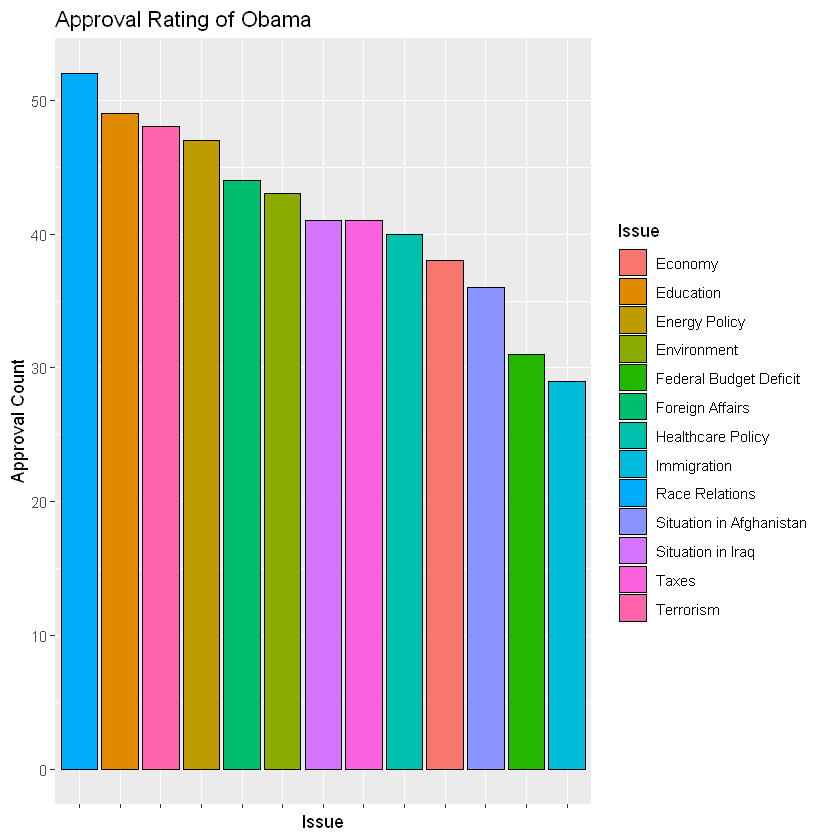

In [94]:
obama %>%
    dplyr::select(Issue, Approve) %>%
    dplyr::arrange(-Approve) %>%
    dplyr::mutate(SortOrder = factor(Issue, Issue)) %>% 
    ggplot2::ggplot(ggplot2::aes(x=SortOrder, y=Approve, fill=Issue)) +
        ggplot2::geom_bar(stat='identity', color='black') + 
        ggplot2::xlab('Issue') + ggplot2::ylab('Approval Count') +
        ggplot2::theme(axis.text.x=element_blank()) +
        ggplot2::ggtitle('Approval Rating of Obama') 

**Stacked Bar Chart**

For this, I will plot each issue with their respective Approval, Disapproval and Neutral counts. This will generate a 100% stacked bar chart for each issue, so that the reactions are rightfully captured.

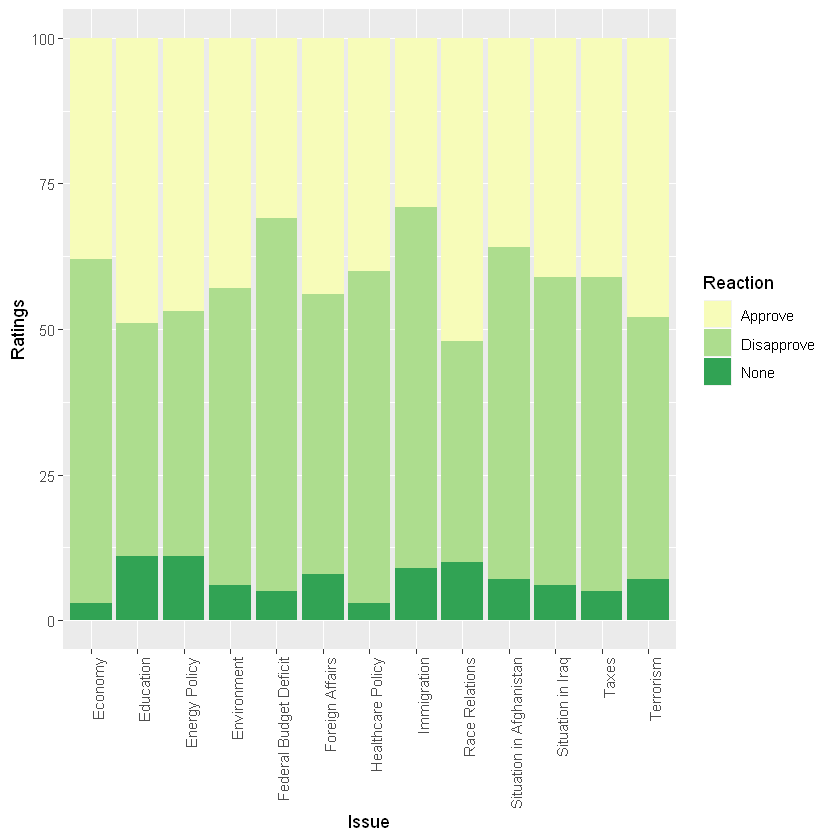

In [103]:
# We need to reshape the data to long format for this purpose
obama_long = obama %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Plot stacked
ggplot2::ggplot(data = obama_long, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    ggplot2::scale_fill_brewer(palette = 15)

**Pie Chart**

For pie chart demonstration, I would like to pick the Immigration issue and plot the different ratings in a pie.

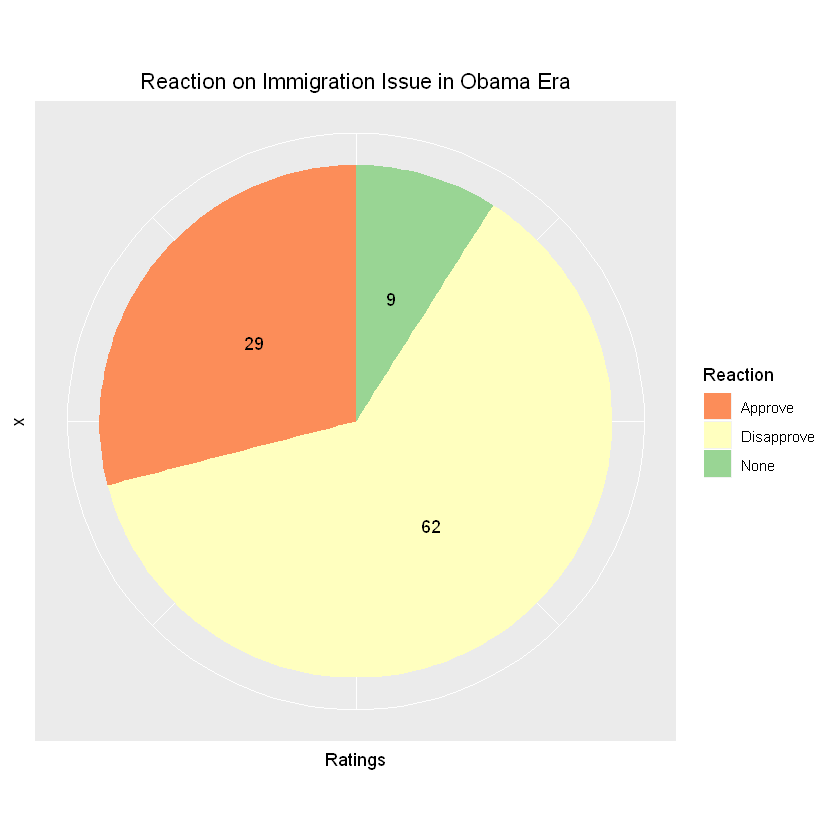

In [131]:
# For this purpose, I would need the long data set. Because we need the stacked chart before creating pie chart from it
# Since pie chart is not easy to digest, I would NOT use the same color family for the different sections
obama_long %>%
    dplyr::filter(Issue=='Immigration') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(aes(label = Ratings), position = position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Immigration Issue in Obama Era') +
        ggplot2::scale_fill_brewer(palette='Spectral') + 
        ggplot2::theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = 0.5))

**Donut Chart**

For donut chart demonstration, I would like to pick the Education issue and plot the different ratings in the shape of a ring/donut.

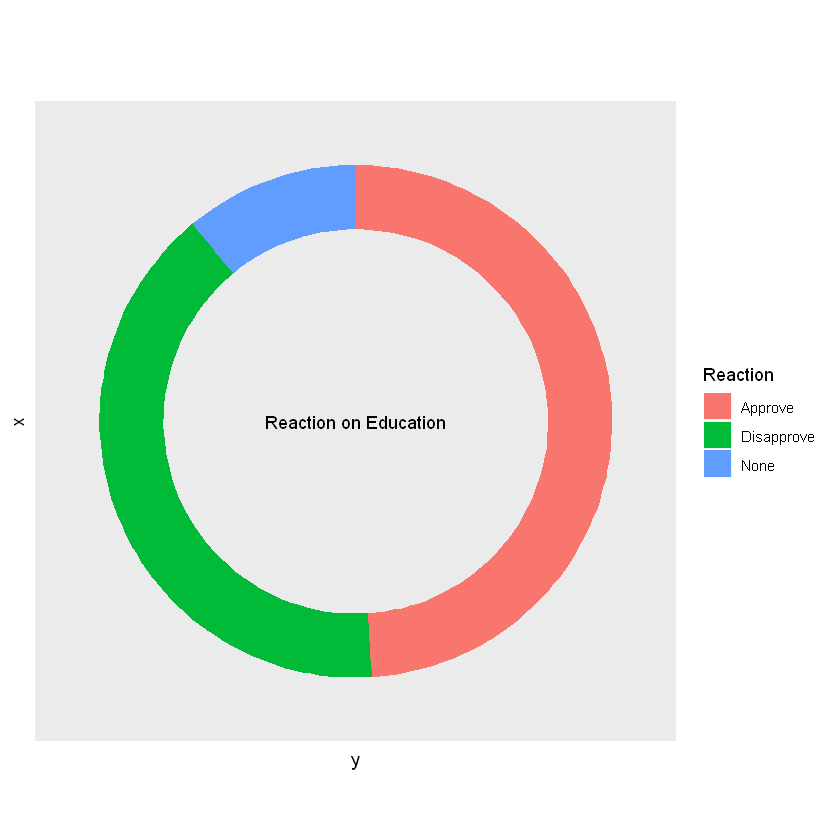

In [141]:
obama_long %>%
    dplyr::filter(Issue=='Education') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::theme(panel.grid=element_blank()) +
         ggplot2::theme(axis.text=element_blank()) +
         ggplot2::theme(axis.ticks=element_blank()) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Education') +
         ggplot2::labs(title='')